<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/pandas_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandas 


## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [57]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [58]:
print(pd.__version__)

1.5.3


**3.** Print out all the version information of the libraries that are required by the pandas library.

In [59]:
print(pd.show_versions())


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.9.16.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.6.1
pip              : 23.0.1
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           :

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [60]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

**5.** Display a summary of the basic information about this DataFrame and its data.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**6.** Return the first 3 rows of the DataFrame `df`.

In [62]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [63]:
print(df[['animal','age']])

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [64]:
print(df.loc[['d','e','i'],['animal','age']])

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [65]:
print(df[df['visits'] > 3])

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [66]:
print(df[df['age'].isna()])

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [67]:
print(df[(df['animal'] == 'cat') & (df['age'] < 3)])

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [68]:
print(df[(df['age'] >= 2) & (df['age'] <= 4)])

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


**13.** Change the age in row 'f' to 1.5.

In [69]:
df.loc['f','age'] = 1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [70]:
total_visits = df['visits'].sum()

**15.** Calculate the mean age for each different animal in `df`.

In [71]:
mean_age = df.groupby('animal')['age'].mean()
print(mean_age)

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [72]:
df.loc['k'] = ['bird','1','2','no']
print(df)


  animal  age visits priority
a    cat  2.5      1      yes
b    cat  3.0      3      yes
c  snake  0.5      2       no
d    dog  NaN      3      yes
e    dog  5.0      2       no
f    cat  1.5      3       no
g  snake  4.5      1       no
h    cat  NaN      1      yes
i    dog  7.0      2       no
j    dog  3.0      1       no
k   bird    1      2       no


In [73]:
df = df.drop('k')
print(df)

  animal  age visits priority
a    cat  2.5      1      yes
b    cat  3.0      3      yes
c  snake  0.5      2       no
d    dog  NaN      3      yes
e    dog  5.0      2       no
f    cat  1.5      3       no
g  snake  4.5      1       no
h    cat  NaN      1      yes
i    dog  7.0      2       no
j    dog  3.0      1       no


**17.** Count the number of each type of animal in `df`.

In [74]:
counts = df['animal'].value_counts()
print(counts)

cat      4
dog      4
snake    2
Name: animal, dtype: int64


**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [75]:
sorted_df = df.sort_values(['age','visits'], ascending=[False,True])
print(sorted_df)

  animal  age visits priority
i    dog  7.0      2       no
e    dog  5.0      2       no
g  snake  4.5      1       no
j    dog  3.0      1       no
b    cat  3.0      3      yes
a    cat  2.5      1      yes
f    cat  1.5      3       no
c  snake  0.5      2       no
h    cat  NaN      1      yes
d    dog  NaN      3      yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [76]:
df['priority'] = df['priority'].replace({'yes':True, 'no':False})
print(df)

  animal  age visits  priority
a    cat  2.5      1      True
b    cat  3.0      3      True
c  snake  0.5      2     False
d    dog  NaN      3      True
e    dog  5.0      2     False
f    cat  1.5      3     False
g  snake  4.5      1     False
h    cat  NaN      1      True
i    dog  7.0      2     False
j    dog  3.0      1     False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [77]:
df['animal'] = df['animal'].replace('snake','python')

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [78]:
df_pivot = df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')
print(df_pivot)

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [79]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
mask = df['A'] != df['A'].shift(1)
filtered_df = df[mask]
print(filtered_df)

   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [80]:
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
row_mean = df.mean(axis=1)
df = df.apply(lambda row: row - row_mean[row.name], axis = 1)
print(df)

          0         1         2
0  0.107665 -0.379065  0.271400
1 -0.508905  0.347435  0.161470
2 -0.222669  0.513956 -0.291288
3  0.202711  0.167093 -0.369804
4 -0.070889 -0.214362  0.285251


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [81]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
smallest_sum_col = df.sum().idxmin()
print(smallest_sum_col)

i


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [82]:
# create a sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3, 1, 2, 3],
                   'B': [4, 5, 6, 4, 5, 6]})
unique_rows = len(df.drop_duplicates())
print(unique_rows)

3


The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [83]:
df = pd.DataFrame(np.random.randn(5,10))
mask = np.zeros((5,10), dtype=bool)
mask[np.arange(5), np.random.choice(10,5, replace=False)] = True
df[mask] = np.nan
def find_third_nan_index(row):
  nan_indices = np.where(np.isnan(row))[0]
  if len(nan_indices) < 3:
    return np.nan
  else:
    return nan_indices[2]

third_nan_columns = df.apply(find_third_nan_index, axis=1)
print(third_nan_columns)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64


**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [84]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
def sum_top_three(x):
  return x.nlargest(3).sum()

result = df.groupby('grps')['vals'].apply(sum_top_three)
print(result)

  


grps
a    409
b    156
c    345
Name: vals, dtype: int64


**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [85]:
# Create sample data
df = pd.DataFrame({'A': [4, 13, 25, 37, 47, 59, 68, 72, 84, 91],
                   'B': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]})
df['group'] = (df['A'] // 10) * 10
grouped = df.groupby('group')
result = grouped['B'].sum()
print(result)

group
0      10
10     20
20     30
30     40
40     50
50     60
60     70
70     80
80     90
90    100
Name: B, dtype: int64


## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [86]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Find the locations of zeros in the X column
zeros = np.where(df['X'] == 0)[0]

# Calculate the distance to the previous zero for each value
distances = np.diff(zeros)
distances = np.insert(distances, 0, zeros[0]+1)  # Handle first value

# Add the new column Y to the DataFrame
df['Y'] = [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]

Here's an alternative approach based on a [cookbook recipe](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping):

**30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

In [87]:
df = pd.DataFrame(np.random.randn(5,3))
s = df.unstack()
largest_values = s.nlargest(3)
largest_index_values = largest_values.index.tolist()
print(largest_index_values)

[(1, 1), (1, 3), (1, 0)]


**31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

In [88]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
group_means = df.groupby('group')['value'].transform('mean')
df.loc[df['value'] < 0, 'value'] = group_means

**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [89]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
df['rolling_mean'] = df.groupby('group')['value'].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
group_means = df.groupby('group')['value'].transform('mean')
df['rolling_mean'] = df['rolling_mean'].fillna(group_means)
print(df)

   group  value  rolling_mean
0      a    1.0      1.000000
1      a    2.0      1.500000
2      b    3.0      3.000000
3      b    NaN      3.000000
4      a    2.0      1.666667
5      b    3.0      3.000000
6      b    NaN      3.000000
7      b    1.0      2.000000
8      a    7.0      3.666667
9      b    3.0      2.000000
10     a    NaN      4.500000
11     b    8.0      4.000000


## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [90]:
dti = pd.date_range(start = '2015-01-01', end = '2015-12-31', freq = 'B')
s = pd.Series(np.random.randn(len(dti)), index = dti)
print(s)

2015-01-01   -1.192475
2015-01-02   -1.171693
2015-01-05   -0.034225
2015-01-06   -1.835803
2015-01-07   -0.770763
                ...   
2015-12-25   -0.210745
2015-12-28    0.348226
2015-12-29    1.581554
2015-12-30   -0.892529
2015-12-31   -1.170329
Freq: B, Length: 261, dtype: float64


**34.** Find the sum of the values in `s` for every Wednesday.

In [91]:
wednesdays = s.index.weekday == 2
wednesday_values = s[wednesdays]
wednesday_values_sum = wednesday_values.sum()
print(wednesday_values_sum)

-6.149669098315639


In [92]:
wednesday_sum = s.resample('W-WED').sum()
print(wednesday_sum)

2015-01-07   -5.004959
2015-01-14   -1.743803
2015-01-21    2.841532
2015-01-28   -1.585532
2015-02-04    1.839938
2015-02-11    2.842496
2015-02-18   -0.437018
2015-02-25    1.457027
2015-03-04   -2.588024
2015-03-11   -1.610273
2015-03-18   -0.809639
2015-03-25    1.908828
2015-04-01   -3.363998
2015-04-08    0.592486
2015-04-15   -0.366084
2015-04-22   -3.139358
2015-04-29   -2.452460
2015-05-06    2.967950
2015-05-13    2.016281
2015-05-20   -2.617513
2015-05-27   -0.950041
2015-06-03    1.065675
2015-06-10   -0.698723
2015-06-17    1.610979
2015-06-24    0.625968
2015-07-01    2.391646
2015-07-08    0.280741
2015-07-15    0.446244
2015-07-22   -0.418200
2015-07-29   -2.182249
2015-08-05   -3.959274
2015-08-12    2.117680
2015-08-19   -2.278976
2015-08-26    2.503438
2015-09-02    1.011032
2015-09-09   -0.324722
2015-09-16    3.607732
2015-09-23    4.127794
2015-09-30    5.212412
2015-10-07    1.920949
2015-10-14    2.348025
2015-10-21   -1.616673
2015-10-28    4.290378
2015-11-04 

**35.** For each calendar month in `s`, find the mean of values.

In [93]:
monthly_mean = s.resample('M').mean()
print(monthly_mean)

2015-01-31   -0.197527
2015-02-28    0.216074
2015-03-31   -0.291023
2015-04-30   -0.164719
2015-05-31    0.042416
2015-06-30    0.115149
2015-07-31   -0.202043
2015-08-31    0.129176
2015-09-30    0.613534
2015-10-31    0.410750
2015-11-30    0.247675
2015-12-31   -0.014804
Freq: M, dtype: float64


**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [94]:
import pandas as pd

# Create a DatetimeIndex for each business day of 2015
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B')

# Create a Series of random numbers and use the DatetimeIndex to index it
s = pd.Series(data=np.random.rand(len(dti)), index=dti)

# Resample to get the max value for each calendar month
max_monthly = s.resample('M').max()

# Create a DataFrame with the max value and the month it occurred in
df = pd.DataFrame({'max_value': max_monthly, 'month': max_monthly.index.month})

# Group by four consecutive months and find the max value and the month it occurred in
max_consecutive = df.groupby((df['month'] - 1) // 4).apply(lambda x: x.loc[x['max_value'].idxmax()])

# Print the result
print(max_consecutive['max_value'])
print(max_consecutive.index * 4 + 1)


month
0    0.976965
1    0.993913
2    0.999836
Name: max_value, dtype: float64
Int64Index([1, 5, 9], dtype='int64', name='month')


**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [95]:
import pandas as pd
from dateutil.relativedelta import relativedelta, TH
from dateutil.parser import parse

# Create a start date and an end date
start_date = parse('2015-01-01')
end_date = parse('2016-12-31')

# Create a list of third Thursdays for each month from start to end date
third_thursdays = []
for year in range(start_date.year, end_date.year + 1):
    for month in range(1, 13):
        # Find the date of the third Thursday of the month
        date = parse(f'{year}-{month}-01') + relativedelta(weekday=TH(3))
        if date.year == year:
            third_thursdays.append(date)

# Create a DatetimeIndex from the list of third Thursdays
dti = pd.DatetimeIndex(third_thursdays)



## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [96]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
print(df)

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


**39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [97]:
temp_df = df['From_To'].str.split('_', expand=True)
temp_df.columns = ['From','To']

**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [98]:
temp_df['From'] = temp_df['From'].str.title()
temp_df['To'] = temp_df['To'].str.title()

**41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [99]:
df = df.drop('From_To', axis=1)
df = pd.concat([df, temp_df], axis=1)
print(df)

   FlightNumber  RecentDelays              Airline      From         To
0         10045      [23, 47]               KLM(!)    London      Paris
1         10055            []    <Air France> (12)    Madrid      Milan
2         10065  [24, 43, 87]  (British Airways. )    London  Stockholm
3         10075          [13]       12. Air France  Budapest      Paris
4         10085      [67, 32]          "Swiss Air"  Brussels     London


**42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [100]:
import re
def extract_airline(name):
  return re.sub('a-zA-Z/s', '', name)
df['Airline Name'] = df['Airline'].apply(extract_airline)

**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [101]:
delays = df['RecentDelays'].apply(lambda x: pd.Series([i for i in x]))
delays = delays.rename(columns=lambda x: 'delay_' + str(x+1))
df = pd.concat([df.drop('RecentDelays', axis=1), delays], axis=1)
print(df)

   FlightNumber              Airline      From         To  \
0         10045               KLM(!)    London      Paris   
1         10055    <Air France> (12)    Madrid      Milan   
2         10065  (British Airways. )    London  Stockholm   
3         10075       12. Air France  Budapest      Paris   
4         10085          "Swiss Air"  Brussels     London   

          Airline Name  delay_1  delay_2  delay_3  
0               KLM(!)     23.0     47.0      NaN  
1    <Air France> (12)      NaN      NaN      NaN  
2  (British Airways. )     24.0     43.0     87.0  
3       12. Air France     13.0      NaN      NaN  
4          "Swiss Air"     67.0     32.0      NaN  


<ipython-input-101-6c49cf1c8c45>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  delays = df['RecentDelays'].apply(lambda x: pd.Series([i for i in x]))


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [102]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
index = pd.MultiIndex.from_product([letters,numbers], names = ['Letters','Numbers'])
s = pd.Series(np.random.randn(30), index=index)
print(s)

Letters  Numbers
A        0         -0.111076
         1         -0.318683
         2         -1.014256
         3          0.042009
         4          1.012617
         5         -0.872382
         6          0.440592
         7         -0.334437
         8          0.911264
         9         -1.214646
B        0         -0.414690
         1          1.754646
         2         -2.185709
         3          0.446151
         4         -1.032497
         5          0.355636
         6          1.473385
         7         -0.107165
         8         -0.358707
         9         -0.683905
C        0          0.717433
         1         -0.250358
         2          1.334582
         3         -0.146349
         4          0.744276
         5          0.415686
         6          2.227109
         7         -0.885113
         8          0.933672
         9          1.097873
dtype: float64


**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [103]:
print(s.index.is_lexsorted())

True


<ipython-input-103-bcb3282e129b>:1: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  print(s.index.is_lexsorted())


**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [104]:
s.loc[:,[1,3,6]]

Letters  Numbers
A        1         -0.318683
         3          0.042009
         6          0.440592
B        1          1.754646
         3          0.446151
         6          1.473385
C        1         -0.250358
         3         -0.146349
         6          2.227109
dtype: float64

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [105]:
s.loc[:'B', 5:]

Letters  Numbers
A        5         -0.872382
         6          0.440592
         7         -0.334437
         8          0.911264
         9         -1.214646
B        5          0.355636
         6          1.473385
         7         -0.107165
         8         -0.358707
         9         -0.683905
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [106]:
sum_by_first_level = s.groupby(level=0).sum()
print(sum_by_first_level)

Letters
A   -1.458997
B   -0.752856
C    6.188812
dtype: float64


**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [107]:
s.groupby(level=1).sum()

Numbers
0    0.191668
1    1.185605
2   -1.865382
3    0.341810
4    0.724396
5   -0.101060
6    4.141086
7   -1.326715
8    1.486229
9   -0.800678
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [108]:
s_swapped = s.swaplevel()
if not s_swapped.index.is_lexsorted():
  s_swapped = s_swapped.sort_index()
print(s_swapped)

Numbers  Letters
0        A         -0.111076
         B         -0.414690
         C          0.717433
1        A         -0.318683
         B          1.754646
         C         -0.250358
2        A         -1.014256
         B         -2.185709
         C          1.334582
3        A          0.042009
         B          0.446151
         C         -0.146349
4        A          1.012617
         B         -1.032497
         C          0.744276
5        A         -0.872382
         B          0.355636
         C          0.415686
6        A          0.440592
         B          1.473385
         C          2.227109
7        A         -0.334437
         B         -0.107165
         C         -0.885113
8        A          0.911264
         B         -0.358707
         C          0.933672
9        A         -1.214646
         B         -0.683905
         C          1.097873
dtype: float64


<ipython-input-108-e4aa82949c5e>:2: FutureWarning: MultiIndex.is_lexsorted is deprecated as a public function, users should use MultiIndex.is_monotonic_increasing instead.
  if not s_swapped.index.is_lexsorted():


## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [109]:
X = 5
Y = 4
coordinates = [(x,y) for x in range(X) for y in range(Y)]
df = pd.DataFrame(coordinates, columns=['x','y'])

**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [110]:
import itertools
import numpy as np
import pandas as pd
X = 5
Y = 4

# create DataFrame with coordinates
coords = list(itertools.product(range(X), range(Y)))
df = pd.DataFrame(coords, columns=['x', 'y'])

# create 'mine' column with specified probability
df['mine'] = np.random.choice([0, 1], size=(X*Y,), p=[0.6, 0.4])

# reshape 'mine' column to match grid shape
#df['mine'] = df['mine'].values.reshape((X, Y))
mines = np.random.choice([0, 1], size=X*Y, p=[0.6, 0.4])
df['mine'] = mines.reshape((X, Y)).flatten()

print(df)


    x  y  mine
0   0  0     1
1   0  1     0
2   0  2     0
3   0  3     0
4   1  0     1
5   1  1     1
6   1  2     0
7   1  3     0
8   2  0     0
9   2  1     0
10  2  2     0
11  2  3     1
12  3  0     0
13  3  1     1
14  3  2     1
15  3  3     1
16  4  0     0
17  4  1     0
18  4  2     0
19  4  3     0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [56]:
X = 5
Y = 4

# create DataFrame with coordinates
x_coords, y_coords = np.meshgrid(range(X), range(Y))
df = pd.DataFrame({'x': x_coords.ravel(), 'y': y_coords.ravel()})
df['mine'] = np.random.choice([0, 1], size=(X*Y,), p=[0.6, 0.4])

def count_adjacent_mines(x, y, df):
    """
    Count the number of mines in adjacent cells to the (x, y) coordinate.
    If the current cell contains a mine, return np.nan instead of the count.
    """
    # Define the coordinates of the adjacent cells
    adj_coords = [(x-1, y-1), (x-1, y), (x-1, y+1), (x, y-1), (x, y+1), (x+1, y-1), (x+1, y), (x+1, y+1)]
    
    # Count the number of mines in adjacent cells
    count = 0
    for i, j in adj_coords:
        if (i >= 0 and i <= df['x'].max()) and (j >= 0 and j <= df['y'].max()):
            count += df.loc[(df['x'] == i) & (df['y'] == j), 'mine'].item()
    
    if df.loc[(df['x'] == x) & (df['y'] == y), 'mine'].item():
        return np.nan
    else:
        return count

df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row['x'], row['y'], df), axis=1)

print(df)


    x  y  mine  adjacent
0   0  0     0       0.0
1   1  0     0       0.0
2   2  0     0       1.0
3   3  0     1       NaN
4   4  0     1       NaN
5   0  1     0       1.0
6   1  1     0       2.0
7   2  1     0       4.0
8   3  1     0       5.0
9   4  1     1       NaN
10  0  2     0       2.0
11  1  2     1       NaN
12  2  2     1       NaN
13  3  2     1       NaN
14  4  2     0       3.0
15  0  3     0       2.0
16  1  3     1       NaN
17  2  3     1       NaN
18  3  3     1       NaN
19  4  3     0       2.0


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [111]:

X = 5
Y = 4

# create DataFrame with coordinates
x_coords, y_coords = np.meshgrid(range(X), range(Y))
df = pd.DataFrame({'x': x_coords.ravel(), 'y': y_coords.ravel()})
df['mine'] = np.random.choice([0, 1], size=(X*Y,), p=[0.6, 0.4])

def count_adjacent_mines(x, y, df):
    """
    Count the number of mines in adjacent cells to the (x, y) coordinate.
    If the current cell contains a mine, return np.nan instead of the count.
    """
    # Define the coordinates of the adjacent cells
    adj_coords = [(x-1, y-1), (x-1, y), (x-1, y+1), (x, y-1), (x, y+1), (x+1, y-1), (x+1, y), (x+1, y+1)]
    
    # Count the number of mines in adjacent cells
    count = 0
    for i, j in adj_coords:
        if (i >= 0 and i <= df['x'].max()) and (j >= 0 and j <= df['y'].max()):
            count += df.loc[(df['x'] == i) & (df['y'] == j), 'mine'].item()
    
    if df.loc[(df['x'] == x) & (df['y'] == y), 'mine'].item():
        return np.nan
    else:
        return count

df['adjacent'] = df.apply(lambda row: count_adjacent_mines(row['x'], row['y'], df), axis=1)

print(df)


    x  y  mine  adjacent
0   0  0     0       2.0
1   1  0     1       NaN
2   2  0     1       NaN
3   3  0     1       NaN
4   4  0     0       3.0
5   0  1     1       NaN
6   1  1     0       5.0
7   2  1     0       5.0
8   3  1     1       NaN
9   4  1     1       NaN
10  0  2     1       NaN
11  1  2     0       4.0
12  2  2     1       NaN
13  3  2     0       5.0
14  4  2     0       4.0
15  0  3     0       2.0
16  1  3     1       NaN
17  2  3     0       3.0
18  3  3     1       NaN
19  4  3     1       NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [112]:
grid = df.pivot(index='y', columns='x', values='adjacent')
print(grid)


x    0    1    2    3    4
y                         
0  2.0  NaN  NaN  NaN  3.0
1  NaN  5.0  5.0  NaN  NaN
2  NaN  4.0  NaN  5.0  4.0
3  2.0  NaN  3.0  NaN  NaN


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

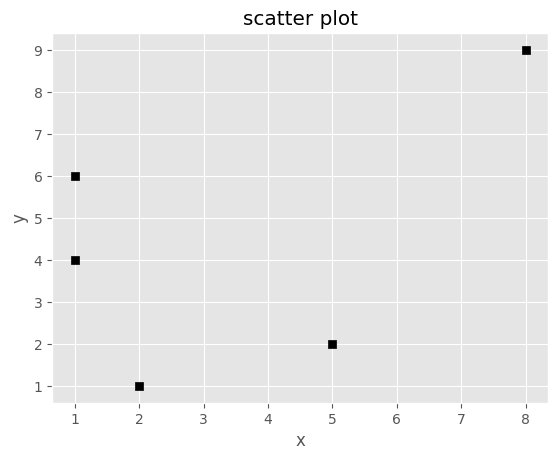

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.scatter(df['xs'], df['ys'], marker = 's', color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot')
plt.show()

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

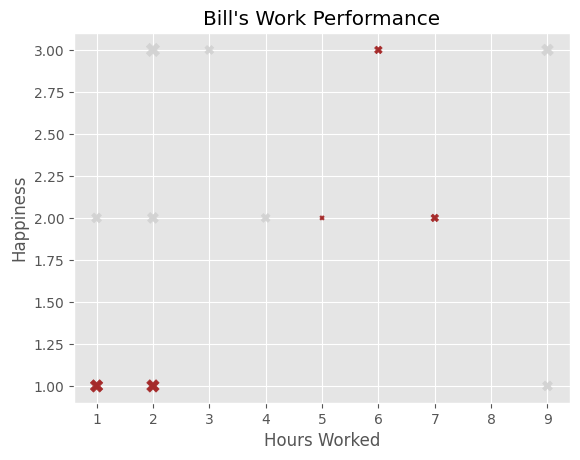

In [114]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
coffee_cmap = {0:'lightgray',1:'brown'}
productivity_size = df['productivity']*10
productivity_marker = 'X'
plt.scatter(df['hours_in'], df['happiness'], c=df['caffienated'].map(coffee_cmap), s=productivity_size, marker=productivity_marker)
plt.xlabel('Hours Worked')
plt.ylabel('Happiness')
plt.title('Bill\'s Work Performance')
plt.show()

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

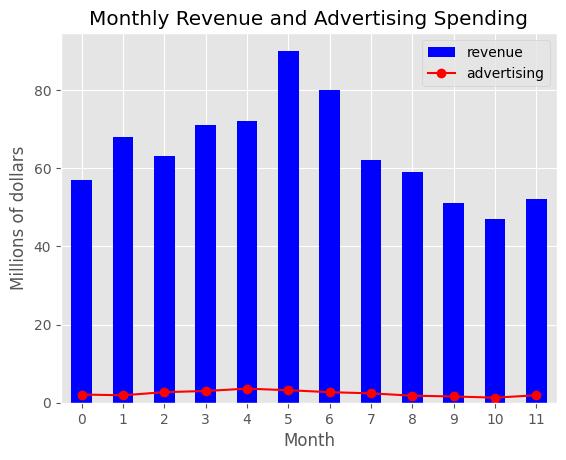

In [117]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
fig, ax = plt.subplots()
df.plot(kind='bar', x='month', y='revenue', ax=ax, color='blue')
df.plot(kind='line', x='month', y='advertising',ax=ax, color='red', marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Millions of dollars')
ax.set_title('Monthly Revenue and Advertising Spending')
plt.show()

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [118]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [119]:
stock_data = day_stock_data()
stock_data['hour'] = stock_data['time'].dt.floor('H')
hourly_summary = stock_data.groupby('hour')['price'].agg(['first','max','min','last'])
hourly_summary = hourly_summary.rename(columns={'first':'open', 'max':'high', 'min':'low', 'last':'close'})
hourly_summary['color'] = np.where(hourly_summary['close'] >= hourly_summary['open'], 'green', 'red')
print(hourly_summary)

                           open        high        low       close  color
hour                                                                     
2023-04-18 09:00:00  100.000000  100.844437  99.290177   99.445117    red
2023-04-18 10:00:00   99.494423  100.494181  99.134204  100.035861  green
2023-04-18 11:00:00   99.969658  102.888016  99.405057  102.795379  green
2023-04-18 12:00:00  102.758594  102.830763  99.479172   99.567632    red
2023-04-18 13:00:00   99.572934  101.041110  98.899016  100.087916  green
2023-04-18 14:00:00  100.185481  100.604220  97.769259   98.494047    red
2023-04-18 15:00:00   98.400836  100.936958  98.320278  100.320749  green


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

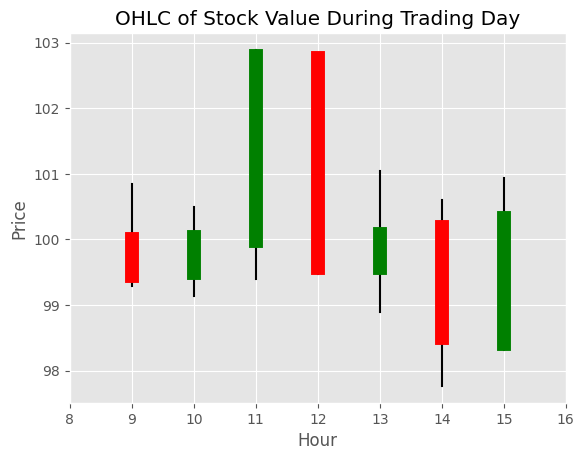

In [122]:
plot_candlestick(hourly_summary)
